# Processing Images and Videos - Exercises Solutions
## Computer Vision and Image Processing - Lab Session 3
### Prof: Luigi Di Stefano, luigi.distefano@unibo.it
### Tutor: Pierluigi Zama Ramirez, pierluigi.zama@unibo.it - Alex Costanzino, alex.costanzino@unibo.it

## Exercise 1: Linear Contrast Stretching
Implement a linear contrast stretching function.

Given $P_{max}$ and $P_{min}$ the maximum and minimum pixel value respectively (can be different from the min and max values of the image), convert each pixel of the original image $P_{in}$ into the new pixel of the output image $P_{out}$ with the following formula:

$P_{out} = \frac{255}{P_{max} - P_{min}}(P_{in} - P_{min})$

Test the function 3 times on the __grayscale__ image "ex/image.png" using as $P_{max}$ and $P_{min}$:

* The minimum and maximum value of the image  respectively. You can use **np.max(array, axis)** and **np.min(array, axis)** to calculate them. 
* $P_{max}=40$ and $P_{min}=0$.
* Choose as $P_{max}$ and $P_{min}$ the values at 95% and 5% percentiles of the distribution respectively (the value of the 5% pixels ordered from the lowest value pixel). 

Plot the histogram of the image before and after each transformation.

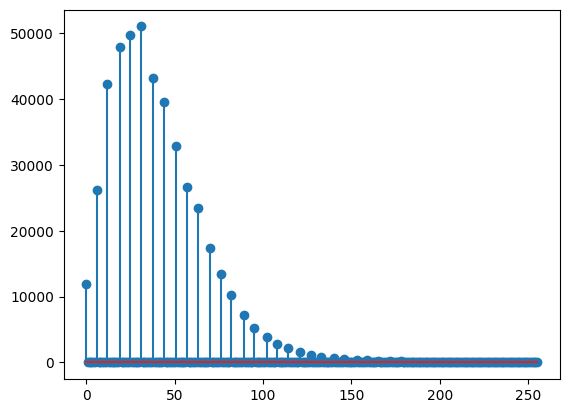

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def linearStretch(image, Pmin, Pmax):
    
    return (255.0/(Pmax-Pmin))*(image-Pmin)

img = cv2.imread("ex/image.png", cv2.IMREAD_GRAYSCALE)

hist, bins = np.histogram(linearStretch(img,0,40).flatten(), 256, [0,256])
plt.stem(hist)
plt.show()

## Exercise 2: Mean Filter
Apply a mean filter of kernel size 9x9 to an image.

Test it on the __grayscale__ image "ex/landscape.jpg".

## Exercise 3: Other Filters
Apply a denoising filter and an high-pass filter (edge-enhancement) to an image.

* Denoising filter = $\begin{bmatrix} 
                        1 & 2 & 1\\
                        2 & 4 & 2\\
                        1 & 2 & 1\\
                        \end{bmatrix}\frac{1}{16} $

* High pass filter (edge-enhancement) = $\begin{bmatrix} 
                        0 & 1 & 0\\
                        1 & -4 & 1\\
                        0 & 1 & 0\\
                        \end{bmatrix}$

Test it on the __grayscale__ image "ex/landscape.jpg".

## Exercise 4: Gaussian Filter

Apply a 2D gaussian filter with $\sigma=1.5$ to an image.

Do it twice:
* Finding the gaussian kernel and applying it.  
* Using the OpenCV function for gaussian blurring.

Find the kernel size following the rule of thumb showed in the theory slides.

Test it on the __grayscale__ image "ex/landscape.jpg".

## Exercise 5: Bilateral Filter
Apply a bilateral filter with filter size of 9x9 and both sigma values of 75. 

Test it on the __grayscale__ image "ex/landscape.jpg".

__N.B__:
* Sigma values: If they are small (< 10), the filter will not have much effect, whereas if they are large (> 150), they will have a very strong effect, making the image look “cartoonish”.
* Filter size: Large filters (> 5) are very slow, so it is recommended to use d=5 for real-time applications, and approximately 9 for offline applications that need heavy noise filtering.

## Exercise 6: Exponential Operator

It is sometimes desirable to selectively enhance the contrast in either dark (under-exposed) or bright (over-exposed) areas of the image. Linear stretching, though, would expand the contrast uniformly. However, a non-linear mapping, such as the Exponential Operator, can be deployed:

<img src="LabSession3Images/exp_op.png" width="320">

Thus, taking $r<1$ would stretch the intensity dynamics of dark areas and shrink that of bright ones, which turns out effective to improve under-exposed images. The opposite behaviour is achieved with $r>1$, which therefore can be used to enhance over-exposed images.

The operator is also known as __gamma correction__, due to its widespread use to compensate for the exponential voltage-to-intensity mapping ($I=V^r$) of old CRT monitors (often  $r=2.2$, i.e. darkening), which can be compensated by brightening  the image ($r'=\frac{1}{r}=0.45$) before displaying. 

Given an exponent $r$, $P_{out}$ the output pixel value and $P_{in}$ the input pixel value, the formula for the exponential operator is the following:

$P_{out}=255*(\frac{P_{in}}{255})^r$

Implement an exponential operator using as $r=0.45$.
Test the function on the __grayscale__ image "ex/image.png".
Plot the histogram of the image before and after the transformation.

## Exercise 7: Video Processing

Apply one or more of the previous operators on each frame of the video with path 'ex/1.avi'.